# DIABETES PREDICTION

### I am building a system that can predict whether a person has diabetes or not with the help of Machine Learning

## Importing required Libraries and our dataset

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
diabetes = pd.read_csv('diabetes.csv') 

## Data Exploration 

In [4]:
diabetes.head()            # Gives info of the first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()                # Displays a summary of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes.shape                      # Dimensions of our dataset

(768, 9)

In [9]:
diabetes.describe()          # Gives us statistics of all columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Note how the minimum value of some columns is 0(missing data), we gotta change it later

In [11]:
diabetes.isnull().sum()      # Checking null values in our dataset, which is 0, hence, no null values!!

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Note : <br />
0 - diabetes negative (500 tested negative) <br />
1 - diabetes positive (268 tested positive)

In [13]:
diabetes.groupby('Outcome').mean()       # Mean of all factors for being positive and negative

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


From the above table, we could say that the `insulin, Glucose` and `age` column's `mean` has a major difference, so these 3 features could be the most important for us, in order to decide if an individual is diabetes positive. <br />
<br />


## Data preprocessing 

Notice how we still have `0` in the `min` row, it's time to fit in some values in our missing data

In [50]:
diabetes[["Glucose", "SkinThickness", "Insulin", "BMI", "Age"]] = diabetes[["Glucose", "SkinThickness", "Insulin", "BMI","Age"]].replace(0, np.NaN)

Let's count the NaN values now!

In [51]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We need to change this! <br />
I will replace the NaN values with mean values 

In [52]:
diabetes["Glucose"].fillna(diabetes["Glucose"].mean(), inplace = True)
diabetes["SkinThickness"].fillna(diabetes["SkinThickness"].mean(), inplace = True)
diabetes["Insulin"].fillna(diabetes["Insulin"].mean(), inplace = True)
diabetes["BMI"].fillna(diabetes["BMI"].mean(), inplace = True)

In [53]:
diabetes.isnull().sum()  # Let's check this now

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Normalization of Data

In this section, I am gonna get rid of all data which isn't relevant to us.

In [57]:
labels = diabetes['Outcome']
data = diabetes[['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI','Age']]        # We just want these features out of all 
scaled_data = scale(data, axis = 0) 

In [58]:
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,148.0,72,35.00000,155.548223,33.6,50
1,85.0,66,29.00000,155.548223,26.6,31
2,183.0,64,29.15342,155.548223,23.3,32
3,89.0,66,23.00000,94.000000,28.1,21
4,137.0,40,35.00000,168.000000,43.1,33


As you could see, we are just gonna use 6 features to predict if someone is having diabetes!

## Making a Training and Test Set

I am gonna breakdown the data into training set and test set

In [60]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 1)

In [63]:
# Checking dimensions
print("train_data shape:", train_data.shape)
print("test_data shape:", test_data.shape)
print("train_labels shape:", train_labels.shape)
print("test_labels shape:", test_labels.shape)

train_data shape: (614, 6)
test_data shape: (154, 6)
train_labels shape: (614,)
test_labels shape: (154,)


# Data Modelling

## 1- KNN Algorithm 

Finding the best n possible

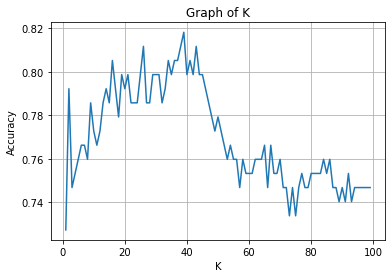

max score is:  0.8181818181818182


In [73]:
scores = []
for k in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    classifier.predict(test_data)
    scores.append(classifier.score(test_data, test_labels))
    
plt.plot(range(1, 100), scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Graph of K')
plt.grid()
plt.show()
print("max score is: ", max(scores))

In [88]:
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors = 39 )  # n = 39 gives us the max score!
Classifier.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=39)

## 2- SVM algorithm

In [76]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear')
classifier2.fit(train_data, train_labels)

SVC(kernel='linear')

## 3- Naive bayes Classifier 

In [79]:
from sklearn.naive_bayes import MultinomialNB
classifier3 = MultinomialNB()
classifier3.fit(train_data, train_labels)

MultinomialNB()

Let's make predictions on test datasets!

In [89]:
test_classifier1 = Classifier.predict(test_data)
test_classifier2 = classifier2.predict(test_data)
test_classifier3 = classifier3.predict(test_data)

# Model Evaluation 

Now that the classifier has made its predictions, let's see how well it did. <br />
The way to do this is by calling the accuracy_score function.

In [90]:
classifier_score = accuracy_score(test_labels, test_classifier1)
classifier2_score = accuracy_score(test_labels, test_classifier2)
classifier3_score = accuracy_score(test_labels, test_classifier3)

In [91]:
print("Score of KNN is : ", classifier_score)
print("Score of SVM is : ", classifier2_score)
print("Score of Naive bayes algo is : ", classifier3_score)

Score of KNN is :  0.8181818181818182
Score of SVM is :  0.7727272727272727
Score of Naive bayes algo is :  0.551948051948052


### KNN algorithm gives us the best accuracy which is around `82%`

Let's Understand it with the help of a graph

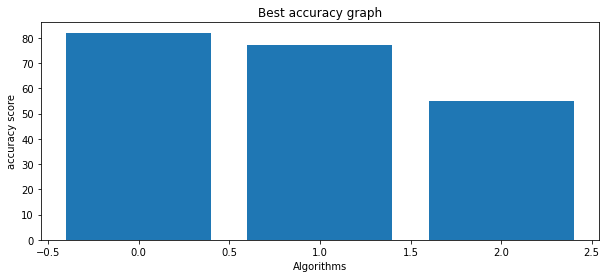

In [104]:
accuracy = [82, 77, 55]
plt.figure(figsize = (10,4))
plt.bar(range(len(accuracy)),accuracy)
plt.xlabel('Algorithms')
plt.ylabel('accuracy score')
plt.title('Best accuracy graph')
plt.show()

0,1,2 are KNN, SVM and naive bayes classifier respectively.